# data analysis

In [1]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
from PIL import Image
import numpy as np
from IPython.display import display, HTML

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\bbartling\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

ahu = r'C:\Users\bbartling\Desktop\AutonomousBuildingOperator\data\rtu_20240706_101808.png'
ahu_copy_1 = ahu
ahu_copy_2 = ahu

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Mild upscaling of the image
    scale_percent = 150  # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
    
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresh

# Function to extract text from an image
def image_to_text(image_path):
    image = cv2.imread(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Function to display the image
def display_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title('Image')
    plt.axis('off')
    plt.show()


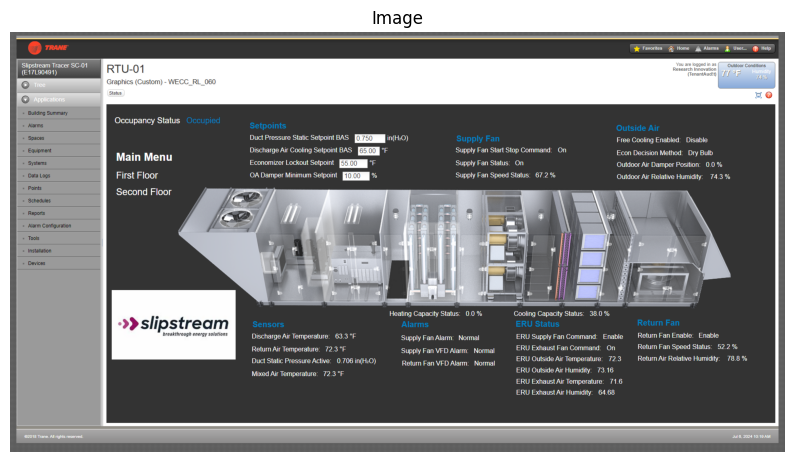

In [2]:
# Read the image using OpenCV
image = cv2.imread(ahu)

display_image(image)


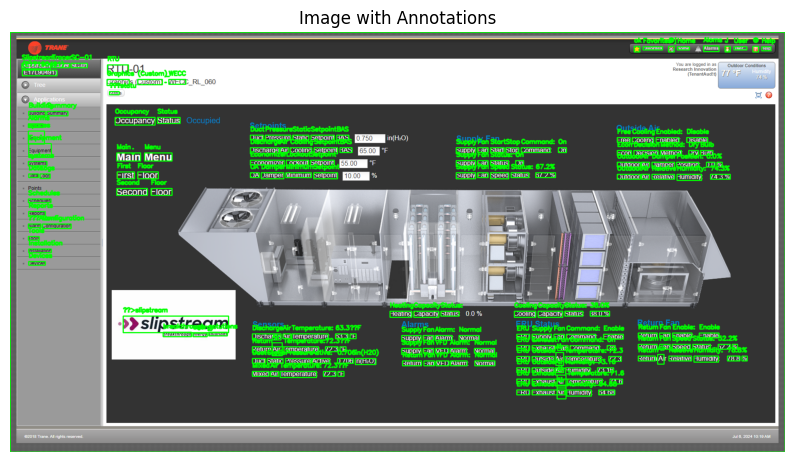

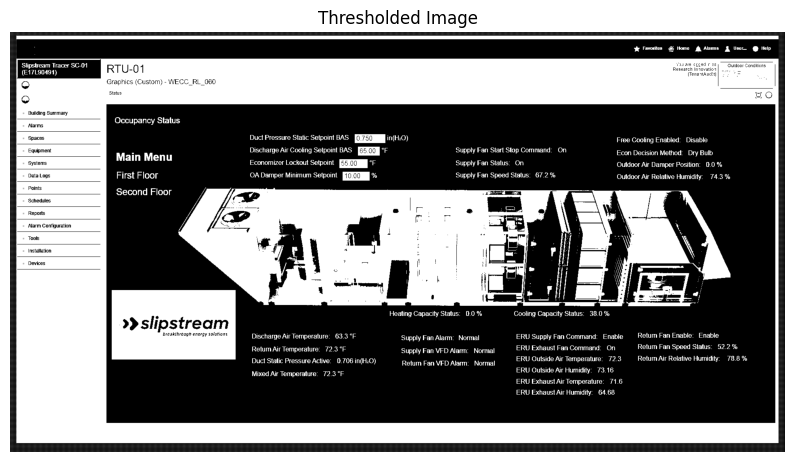

Text,Coordinates
Aloms,"(1718, 34, 38, 14)"
ok,"(1546, 35, 14, 14)"
@j,"(1631, 35, 14, 14)"
J,"(1771, 35, 13, 14)"
@,"(1840, 35, 14, 14)"
Favorites,"(1568, 36, 48, 8)"
Home,"(1653, 36, 30, 8)"
User,"(1793, 36, 32, 8)"
Help,"(1862, 36, 23, 10)"
Slipstream,"(29, 77, 71, 14)"


In [3]:
import pandas as pd

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh, image

# Function to extract text and coordinates from an image
def image_to_text_with_coordinates(image_path):
    preprocessed_image, original_image = preprocess_image(image_path)
    data = pytesseract.image_to_data(preprocessed_image, output_type=pytesseract.Output.DICT)
    text_with_coords = []
    n_boxes = len(data['text'])
    
    for i in range(n_boxes):
        if int(data['conf'][i]) > 0:  # Filter out low-confidence results
            text = data['text'][i]
            x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
            text_with_coords.append((text, (x, y, w, h)))
    
    return text_with_coords, original_image, preprocessed_image

# Function to display the image with annotated text
def display_image_with_annotations(image, annotations):
    for text, (x, y, w, h) in annotations:
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        image = cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image with Annotations')
    plt.axis('off')
    plt.show()

# Function to display the thresholded image
def display_thresholded_image(thresh_image):
    plt.figure(figsize=(10, 10))
    plt.imshow(thresh_image, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')
    plt.show()

# Group text elements by proximity
def group_text_elements(text_with_coords, threshold=50):
    groups = []
    current_group = [text_with_coords[0]]
    
    for text, coords in text_with_coords[1:]:
        last_coords = current_group[-1][1]
        if abs(coords[1] - last_coords[1]) <= threshold:
            current_group.append((text, coords))
        else:
            groups.append(current_group)
            current_group = [(text, coords)]
    groups.append(current_group)
    return groups

# Sort text elements within each group
def sort_within_groups(groups):
    sorted_text_with_coords = []
    for group in groups:
        group.sort(key=lambda x: (x[1][1], x[1][0]))
        sorted_text_with_coords.extend(group)
    return sorted_text_with_coords

# Function to form a sentence from text elements
def form_sentence_from_text(text_with_coords):
    sentence = " ".join([text for text, _ in text_with_coords])
    return sentence

extracted_text_with_coords, original_image, thresh_image = image_to_text_with_coordinates(ahu_copy_1)

# Group and sort text elements
groups = group_text_elements(extracted_text_with_coords)
sorted_text_with_coords = sort_within_groups(groups)

# Display the image with annotated text
display_image_with_annotations(original_image, sorted_text_with_coords)

# Display the thresholded image
display_thresholded_image(thresh_image)

# Convert the DataFrame to an HTML table and display it in a scrollable div
html_output = "<table><tr><th>Text</th><th>Coordinates</th></tr>"
for text, coords in sorted_text_with_coords:
    html_output += f"<tr><td>{text}</td><td>{coords}</td></tr>"
html_output += "</table>"
html_output = f"<div style='height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>{html_output}</div>"
display(HTML(html_output))

# Form and print a sentence from the text elements
sentence = form_sentence_from_text(sorted_text_with_coords)


In [4]:
print("FEED SENTENCE INTO CHATGPT")

sentence


FEED SENTENCE INTO CHATGPT


'Aloms ok @j J @ Favorites Home User Help Slipstream Tracer SC-01 RTU (E17190491) Graphics (Custom) WECC - ‘statu Building Summary Occupancy Status Alarms spaces Duct Pressure Static Setpoint BAS Discharge Air Cooling Setpoint BAS Main . Menu Economizer Lockout Setpoint systems First Floor OA Damper Minimum Setpoint Free Cooling Enabled: Disable Equipment Supply Fan Start Stop Command: On Econ Decision Method: Dry Bulb Supply Fan Status: On Outdoor Air Damper Position: 0.0 % Supply Fan Speed Status: 67.2% Data Logs Outdoor Air Relative Humidity: 74.3% Schedules Reports ‘Alarm Configuration Tools Installation Devices Second Floor »>slipstream breakthrough sotutions energy Discharge Air Temperature: 63.3 °F Air Retum Temperature: 72.3 °F Duct Static Pressure Active: 0.706 in(H20) Mixed Air Temperature: 72.3 °F Heating Capacity Status: Supply Fan Alarm: Normal Supply Fan VFD Alarm: Normal Retum Fan VFD Alarm: Normal Cooling Capacity Status: 38.0% ERU Supply Fan Command: Enable ERU Exhaust

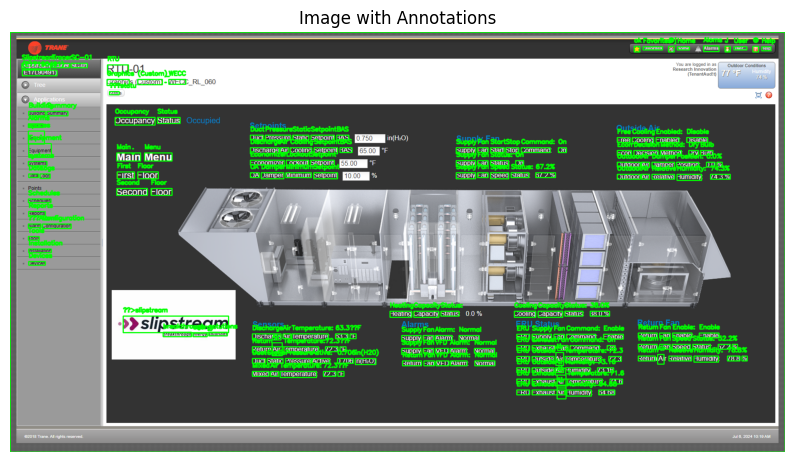

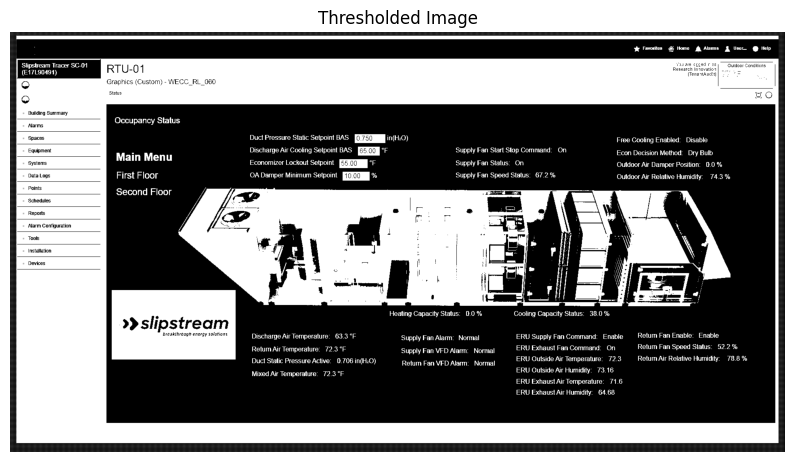

Text,Coordinates
Aloms,"(1718, 34, 38, 14)"
ok,"(1546, 35, 14, 14)"
@j,"(1631, 35, 14, 14)"
J,"(1771, 35, 13, 14)"
@,"(1840, 35, 14, 14)"
Favorites,"(1568, 36, 48, 8)"
Home,"(1653, 36, 30, 8)"
User,"(1793, 36, 32, 8)"
Help,"(1862, 36, 23, 10)"
Slipstream,"(29, 77, 71, 14)"


FEED UNSORTED SENTENCE INTO CHATGPT
Are the sentences identical?  True
Unsorted Sentence:  Aloms ok @j J @ Favorites Home User Help Slipstream Tracer SC-01 RTU (E17190491) Graphics (Custom) WECC - ‘statu Building Summary Occupancy Status Alarms spaces Duct Pressure Static Setpoint BAS Discharge Air Cooling Setpoint BAS Main . Menu Economizer Lockout Setpoint systems First Floor OA Damper Minimum Setpoint Free Cooling Enabled: Disable Equipment Supply Fan Start Stop Command: On Econ Decision Method: Dry Bulb Supply Fan Status: On Outdoor Air Damper Position: 0.0 % Supply Fan Speed Status: 67.2% Data Logs Outdoor Air Relative Humidity: 74.3% Schedules Reports ‘Alarm Configuration Tools Installation Devices Second Floor »>slipstream breakthrough sotutions energy Discharge Air Temperature: 63.3 °F Air Retum Temperature: 72.3 °F Duct Static Pressure Active: 0.706 in(H20) Mixed Air Temperature: 72.3 °F Heating Capacity Status: Supply Fan Alarm: Normal Supply Fan VFD Alarm: Normal Retum Fan V

In [5]:
extracted_text_with_coords, original_image, thresh_image = image_to_text_with_coordinates(ahu_copy_2)

# Group and sort text elements
groups = group_text_elements(extracted_text_with_coords)
unsorted_text_with_coords = sort_within_groups(groups)

# Display the image with annotated text
display_image_with_annotations(original_image, unsorted_text_with_coords)

# Display the thresholded image
display_thresholded_image(thresh_image)

# Convert the list to an HTML table and display it in a scrollable div
html_output = "<table><tr><th>Text</th><th>Coordinates</th></tr>"
for text, coords in unsorted_text_with_coords:
    html_output += f"<tr><td>{text}</td><td>{coords}</td></tr>"
html_output += "</table>"
html_output = f"<div style='height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;'>{html_output}</div>"
display(HTML(html_output))

# Form and print a sentence from the text elements
unsorted_sentence = form_sentence_from_text(unsorted_text_with_coords)

# Programmatically check if the sentences are the same
print("FEED UNSORTED SENTENCE INTO CHATGPT")
print("Are the sentences identical? ", sentence == unsorted_sentence)
print("Unsorted Sentence: ", unsorted_sentence)


## Ask Chat GPT to be RCx Mechanical Engineer

The following data is extracted with computer vision from a BAS graphic of a VAV AHU. Please provide feedback to the human building operator in the following format:

The AHU is currently operating in [mode of operation: heating, or cooling] with [details about outside air temperature conditions if applicable to indicate load on the system or building], and maintaining [specific setpoints or operational parameters for supply duct static pressure or temperature]. The supply fan is [operating at % speed command], achieving [achieved duct static pressure], with the supply air temperature measured at [temperature if applicable]. Relief or return air fans are [status if applicable to this type of HVAC system], and [additional details about system operation]. Airflow measurements from [specific components if system has air flow measuring stations] indicate [observations about airflow direction or volume]. Feedback indicates [assessment of system operation, e.g., effectiveness or issues].

Overall, the AHU appears to be [general assessment of performance and detection of faults like broken valves or dampers for energy inefficiency or sensor errors]. It may be beneficial to [recommendation for improvement, e.g., operational adjustments or maintenance]. Additionally, [consideration of specific operational parameters or setpoints] could be evaluated further especially anything related to ventilation requirements for commercial building and energy efficiency.

## Chat GPT analysis

Here is the RCx mechanical engineer feedback based on the extracted data:

---

**AHU Operational Report**

The AHU is currently operating in cooling mode with outside air temperature conditions at 72.3°F, which indicates a moderate load on the system. It is maintaining a duct static pressure setpoint with an active duct static pressure reading of 0.706 in(H2O). The supply fan is operating at 67.2% speed command, achieving the required duct static pressure. The supply air temperature is measured at 63.3°F.

Relief or return air fans are operating normally, with the return fan speed status at 52.2%. The return air temperature is 72.3°F. Additional system parameters show that the mixed air temperature is 72.3°F, and the outdoor air damper position is at 0.0%, indicating no outdoor air intake at the moment. The outdoor air relative humidity is 74.3%.

The economizer lockout setpoint is not active, and free cooling is disabled. This suggests the system is not currently using outside air for cooling, despite the outside air conditions being favorable for economizer operation.

Feedback indicates that the system is cooling at 38.0% capacity, with the supply fan status confirmed as "On." There are no current alarms for the supply fan or VFDs, suggesting normal operation.

**Overall Assessment and Recommendations**

Overall, the AHU appears to be performing effectively without any detected faults in the supply or return fan operations. However, it may be beneficial to evaluate the economizer settings since outside air conditions seem favorable for free cooling, yet the economizer is locked out. This could lead to potential energy savings if adjusted correctly.

Additionally, regular maintenance of sensors and actuators is recommended to ensure long-term reliability. Ensuring the system transitions smoothly between different modes of operation, such as economizer and mechanical cooling, could improve energy efficiency further.

**Specific Recommendations:**

1. Review and possibly adjust the economizer lockout setpoint to enable free cooling when outside air conditions are favorable.
2. Verify the operation and calibration of the outdoor air damper to ensure it can open when required.
3. Monitor the return air humidity and temperature to optimize indoor air quality and comfort levels.
4. Conduct periodic checks on fan VFDs and associated sensors to prevent any future operational issues.

Considering these adjustments could lead to improved energy efficiency and better utilization of the HVAC system capabilities, ultimately contributing to a more comfortable and energy-efficient building environment.